# **Previsão de Pouso do Primeiro Estágio de Foguetes Falcon 9**


### Análise Exploratória de Dados (AED)

A análise exploratória de dados (EDA) é usada por cientistas de dados para analisar e investigar conjuntos de dados e resumir suas principais características, muitas vezes usando métodos de visualização de dados. Ela permite determinar a melhor forma de controlar as fontes de dados para obter as respostas que você precisa, tornando mais fácil para os cientistas de dados descobrir padrões, detectar anomalias, testar uma hipótese ou verificar suposições.

### Objetivos

* Realizar uma Análise Exploratória nos Dados usando as bibliotecas `Pandas` e `Matplotlib`;
* Preparar os dados para aplicar Engenharia de Características (Feature Engineering).

***


### Importação das bibliotecas necessárias para a AED


In [1]:
# Biblioteca para manipulação e análise de dados
import pandas as pd
# Biblioteca utilizada para trabalho com funções matemáticas de alto nível para manipulação de matrizes uni e multidimensionais
import numpy as np
# Biblioteca de plotagem para python (estrutura de plotagem similar ao MatLab)
import matplotlib.pyplot as plt
# Biblioteca de visualização de dados Python baseada em matplotlib. Fornece uma interface de alto nível para desenhar gráficos estatísticos
import seaborn as sns

### Análise Exploratória dos Dados (AED)

Leitura do conjunto de dados da SpaceX num dataframe Pandas e apresentação do resumo dos dados

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Caso não seja possível ler a URL acima, basta ler o arquivo CSV criado na seção anterior, conforme código abaixo:
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Relação entre Número dos Voos (Flight Number) e Carga Útil (Payload)

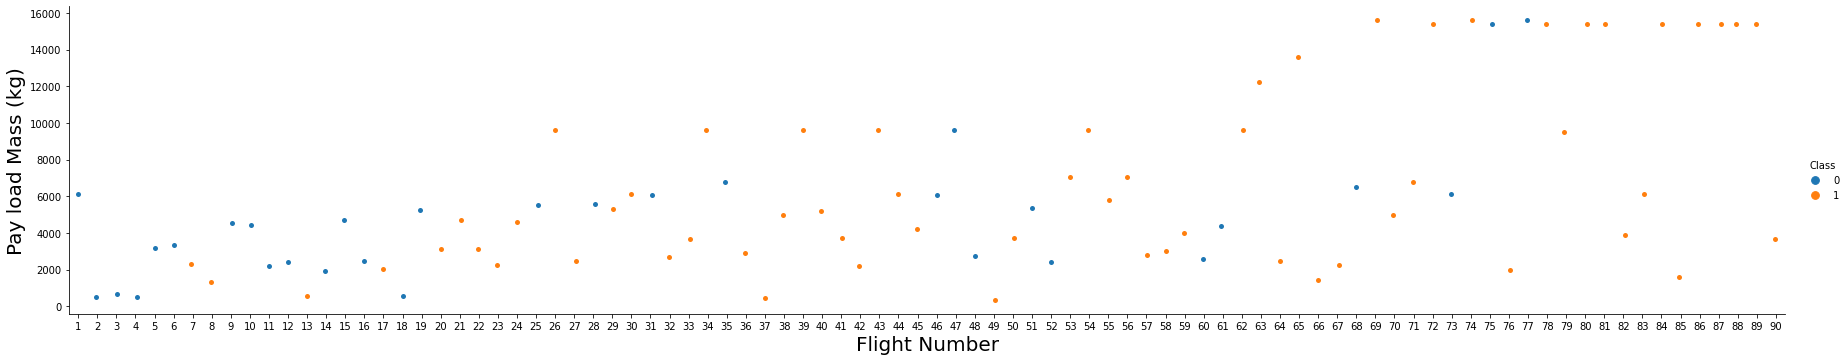

In [3]:
# Plota um gráfico de pontos de dispersão, sendo o eixo x o número dos voos e o eixo y a carga útil e as cores o valor da classe ou classificação do pouso (0: falho; 1: bem sucedido) 
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A partir do gráfico podemos extrair as seguintes informações:

* À medida que o número dos voos aumenta, maior a probabilidade do primeiro estágio pousar;
* Quanto maior a carga útil, menor a probabilidade do primeiro estágio pousar;

### Relação entre Número dos Voos (Flight Number) e Local do Lançamento (Launch Site)

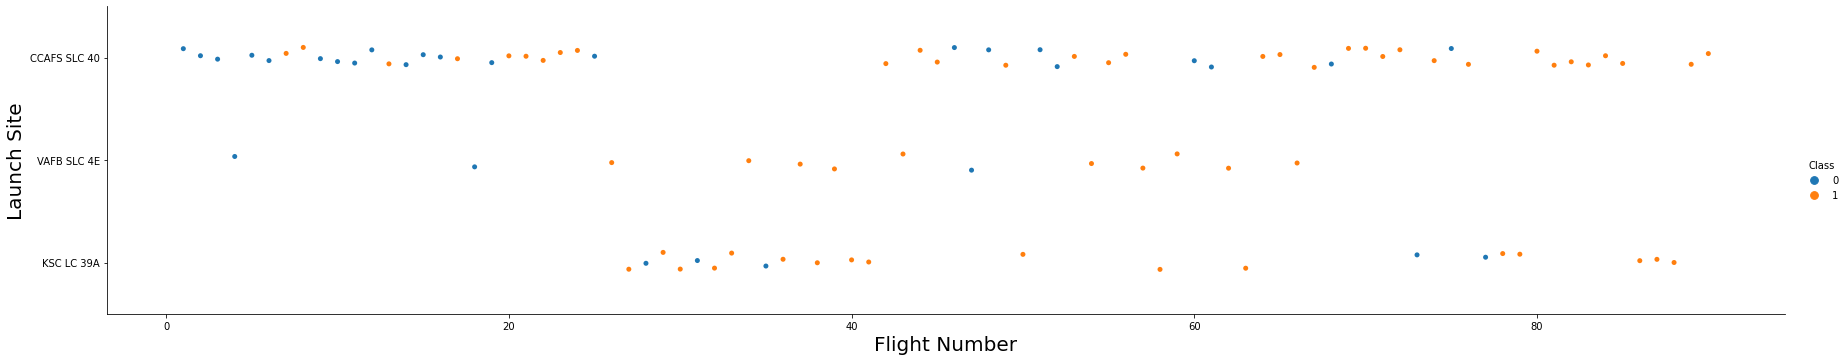

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

A partir do gráfico podemos extrair as seguintes informações:

* O local de lançamento CCAFS SLC 40 possui maior probabilidade do pouso do primeiro estágio falhar;
* CCAFS SLC 40 é o local de lançamento que possui maior número de voos;
* VAFB SLC 4E é o local de lançamento que possui menor númeor de voos;
* Entre outras.

### Relação entre Carga Útil (Payload) e Local do Lançamento (Launch Site)

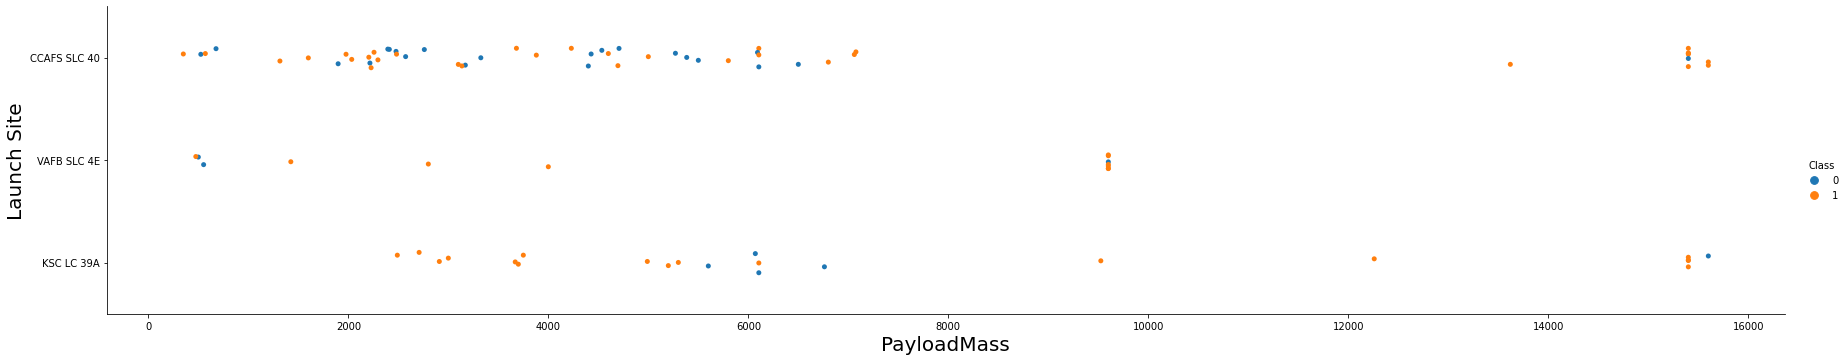

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

A partir do gráfico podemos extrair as seguintes informações:

* O local de lançamento VAFB SLC 4E não realizou lançamentos de foguetes com massa útil maior que 10000;
* CCAFS SLC 40 é o local que não realizou lançamentos de foguetes com massa útil entre 8000 e 12000;
* CCAFS SLC 40 é o local de lançamento que possui maior probabilidade de falhas nos pousos do primeiro estágio com massa inferior a 8000;
* Entre outras.

### Relação entre Taxa de Sucesso nos pousos (Success Rate) e o tipo de Orbita (Orbit)

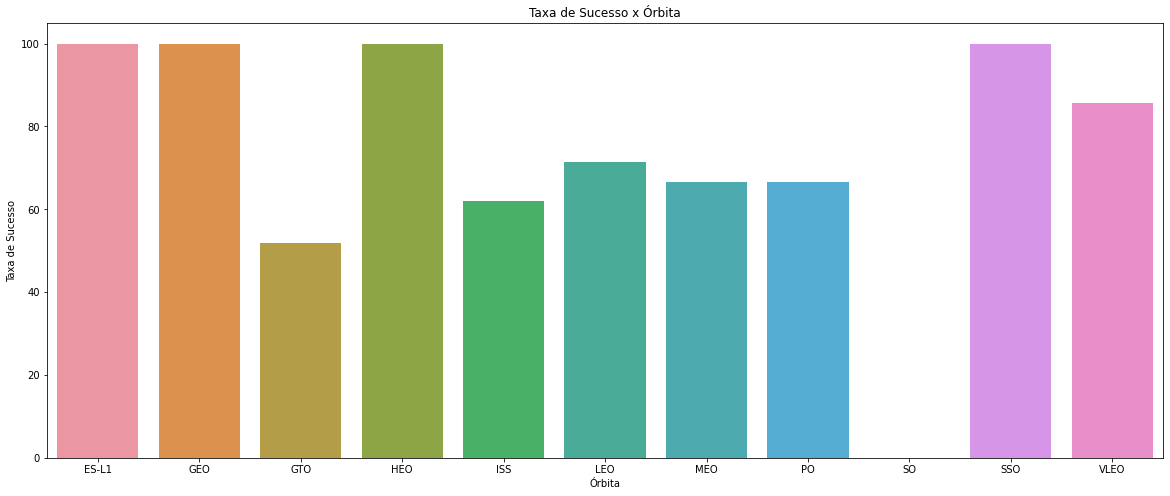

In [18]:
# Agrupa todos os dados por tipo de orbita, calcula a média de todos os dados agrupados e multiplica por 100 para determinar a taxa de sucesso nos pousos (coluna Class)
success_rate = df.groupby('Orbit').mean()*100
success_rate.reset_index(inplace=True)

plt.figure(figsize = (20,8))
sns.barplot(data = success_rate, x = "Orbit", y = "Class")

plt.xlabel('Órbita') # adiciona o rótulo 'Órbita' no eixo x do gráfico
plt.ylabel('Taxa de Sucesso') # adiciona o rótulo 'Taxa de sucesso' no eixo y do gráfico
plt.title('Taxa de Sucesso x Órbita') # adiciona o título do gráfico
plt.show()

A partir do gráfico podemos extrair as seguintes informações:

* As órbitas ES-L1, GEO, HEO e SSO possuem 100% de probabilidade de sucesso nos pousos do primeiro estágio;
* A órbita SO não possui registros de sucesso nos pousos do primeiro estágio do Falcon 9;
* Com exceção de SO, GTO é a órbita que possui menor taxa de sucesso nos pousos do primeiro estágio.

### Relação entre Número dos Voos (Flight Number) e o tipo de Orbita (Orbit)

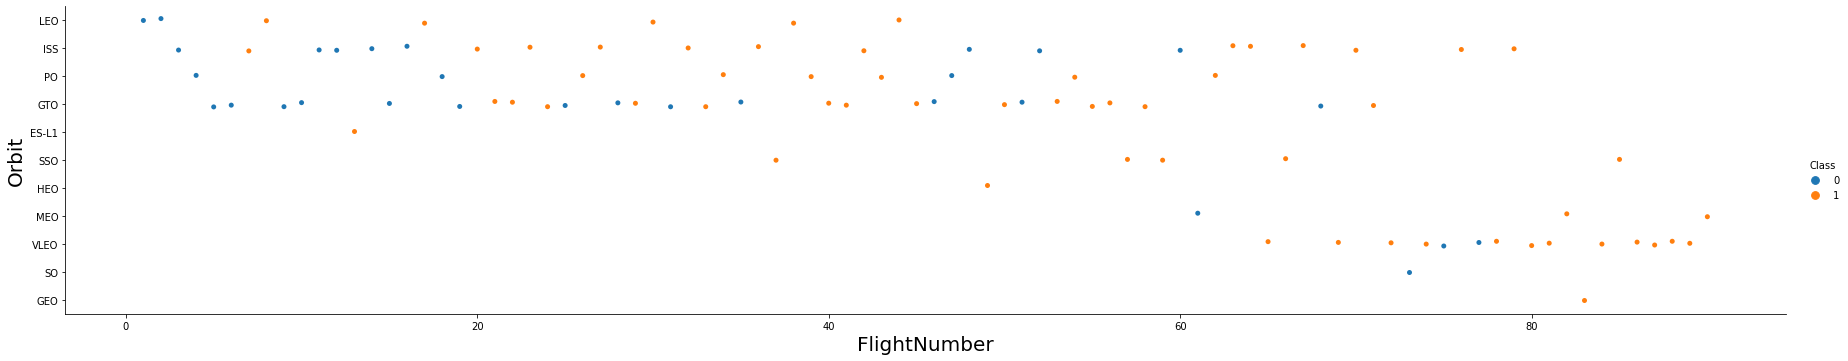

In [28]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

A partir do gráfico podemos extrair as seguintes informações:

* A probabilidade de sucesso nos pousos do primeiro estágio na órbita LEO aumentou conforme o número dos voos nessa órbita aumentaram;
* A órbita GTO parece não possuir relação com o número de voos, no que se refere ao sucesso nas tentativas de pouso do primeiro estágio.

### Relação entre Massa Útil (Payload) e o tipo de Orbita (Orbit)

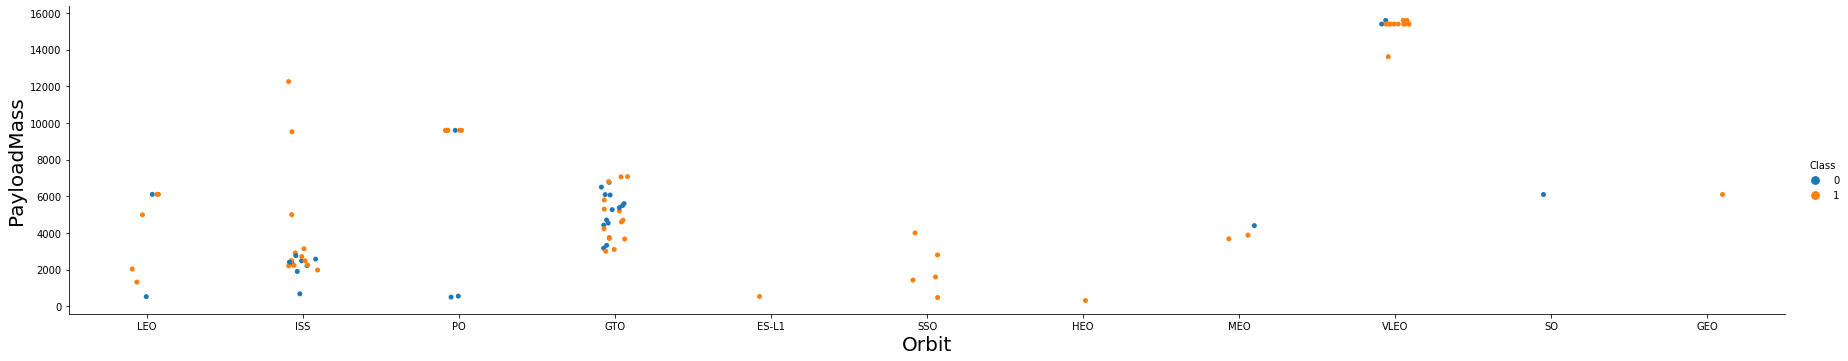

In [31]:
sns.catplot(y="PayloadMass", x="Orbit", hue="Class", data=df, aspect = 5)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

A partir do gráfico podemos extrair as seguintes informações:

* Para as órbitas ISS, LEO e PO quanto maior a massa útil, maior tende a ser a probabilidade de sucesso nos pousos do primeiro estágio;
* A órbita GTO parece não possuir relação entre sucesso nas tentativas de pouso do primeiro estágio e a massa útil deste.

### Gráfico da tendência anual de sucesso nos lançamentos

In [19]:
# Extrai a parcela 'ano' da coluna data 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df['Year'] = Extract_year(df['Date'])
df.head(15)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0,2014
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,2014
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,2014
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0,2014
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0,2014


In [20]:
# Agrupa todos os dados por ano, calcula a média de todos os dados agrupados e multiplica por 100 para determinar a taxa de sucesso nos pousos (coluna Class)
avg_sucess_rate = df.groupby('Year').mean()*100
avg_sucess_rate.reset_index(inplace = True)
avg_sucess_rate.head()


,Year,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
0,2010,100.0,610495.941176,100.0,0.000000,0.0,0.000000,100.0,0.0,-8057.736600,2856.185710,0.000000
1,2012,200.0,52500.000000,100.0,0.000000,0.0,0.000000,100.0,0.0,-8057.736600,2856.185710,0.000000
2,2013,400.0,144900.000000,100.0,0.000000,0.0,0.000000,100.0,0.0,-9392.185367,3058.526907,0.000000
3,2014,850.0,301933.333333,100.0,0.000000,0.0,33.333333,100.0,0.0,-8057.736600,2856.185710,33.333333
4,2015,1450.0,234683.333333,100.0,83.333333,0.0,83.333333,100.0,0.0,-8057.736600,2856.185710,33.333333


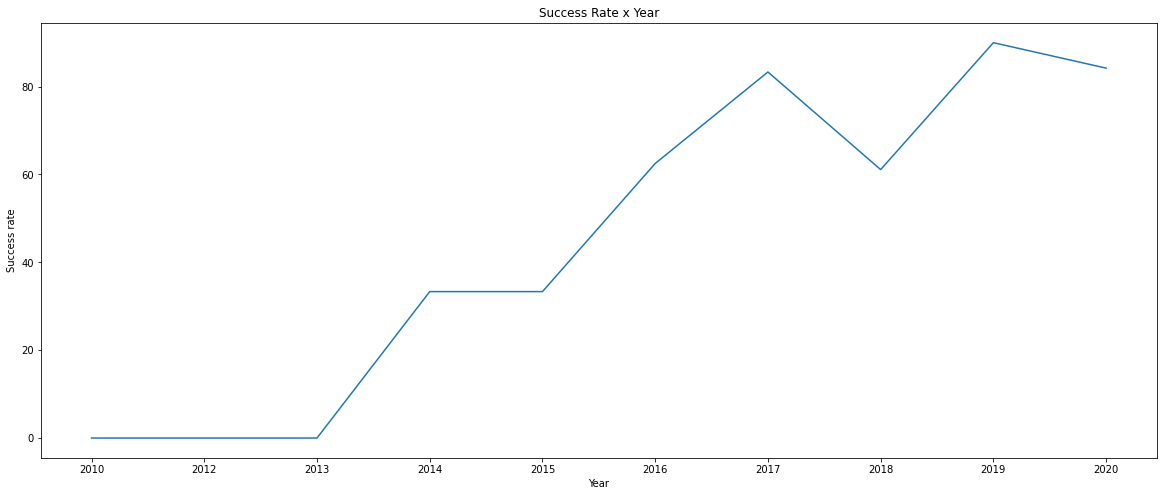

In [21]:
# Plota um gráfico de linha com eixo x sendo o ano e eixo y a taxa de sucesso
plt.figure(figsize = (20,8))
sns.lineplot(data = avg_sucess_rate, x = "Year", y = "Class")

plt.xlabel('Year') 
plt.ylabel('Success rate') 
plt.title('Success Rate x Year') 
plt.show()

A partir do gráfico podemos extrair as seguintes informações:

* A taxa de sucesso nos pousos do primeiro estágio seguiram um aumento a partir de 2013;
* De 2010 à 2013 e de 2014 à 2015 a taxa de sucesso nos pousos se manteve estável, sem aumentos ou diminuições.

### Engenharia de Características (Features Engineering)


Selecionaremos as características que serão utilizadas para prever o sucesso no pouso do primeiro estágio dos Falcon 9:

In [54]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Criação de variáveis dummy para colunas de dados categóricos (não numéricos)

In [66]:
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### Conversão de todas as colunas de dados numéricos para tipo `float64` 

In [69]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

### Exportação do dataframe final para arquivo do formato CSV

In [71]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)